In [2]:
import cv2
import numpy as np
import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load(image_path):
    image = Image.open(image_path)
    image= np.array(image).astype(np.float32)
    if len(image.shape) == 3:
        image = image.sum(axis=2)
    return image

In [14]:
kernel_size = 15
kernel_array = np.zeros((kernel_size,kernel_size))
N = kernel_array.copy()
N[:int((kernel_size - 1)/2)+1,int((kernel_size - 1)/2)] = np.ones(int((kernel_size - 1)/2)+1)

S = kernel_array.copy()
S[int((kernel_size - 1)/2):,int((kernel_size - 1)/2)] = np.ones(int((kernel_size - 1)/2)+1)

E = kernel_array.copy()
E[int((kernel_size - 1)/2),int((kernel_size - 1)/2):] = np.ones(int((kernel_size - 1)/2)+1)

W = kernel_array.copy()
W[int((kernel_size - 1)/2),:int((kernel_size - 1)/2)+1] = np.ones(int((kernel_size - 1)/2)+1)

NE = kernel_array.copy()
a = NE[:int((kernel_size - 1)/2)+1,int((kernel_size - 1)/2):]
mask = np.eye(a.shape[0], dtype=bool)[:,::-1]
a[mask] = 1.0
NE[:int((kernel_size - 1)/2)+1,int((kernel_size - 1)/2):] = a

NW = kernel_array.copy()
a = NW[:int((kernel_size - 1)/2)+1,:int((kernel_size - 1)/2)+1]
mask = np.eye(a.shape[0], dtype=bool)
a[mask] = 1.0
NW[:int((kernel_size - 1)/2)+1,:int((kernel_size - 1)/2)+1] = a

SE = kernel_array.copy()
a = SE[int((kernel_size - 1)/2):,int((kernel_size - 1)/2):]
mask = np.eye(a.shape[0], dtype=bool)
a[mask] = 1.0
SE[int((kernel_size - 1)/2):,int((kernel_size - 1)/2):] = a


SW = kernel_array.copy()
a = SW[int((kernel_size - 1)/2):,:int((kernel_size - 1)/2)+1]
mask = np.eye(a.shape[0], dtype=bool)[:,::-1]
a[mask] = 1.0
SW[int((kernel_size - 1)/2):,:int((kernel_size - 1)/2)+1] = a

In [5]:
print(N)
print(S)
print(E)
print(W)


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [6]:
print(NE)
print(NW)
print(SE)
print(SW)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [15]:
directions = {'N':N,'S':S,'E':E,'W':W,'NE':NE,'NW':NW,'SE':SE,'SW':SW}

In [8]:
all_images = glob.glob('/workspaces/breast-tumor-detection/Data/Resized_Data/pos/*.png')

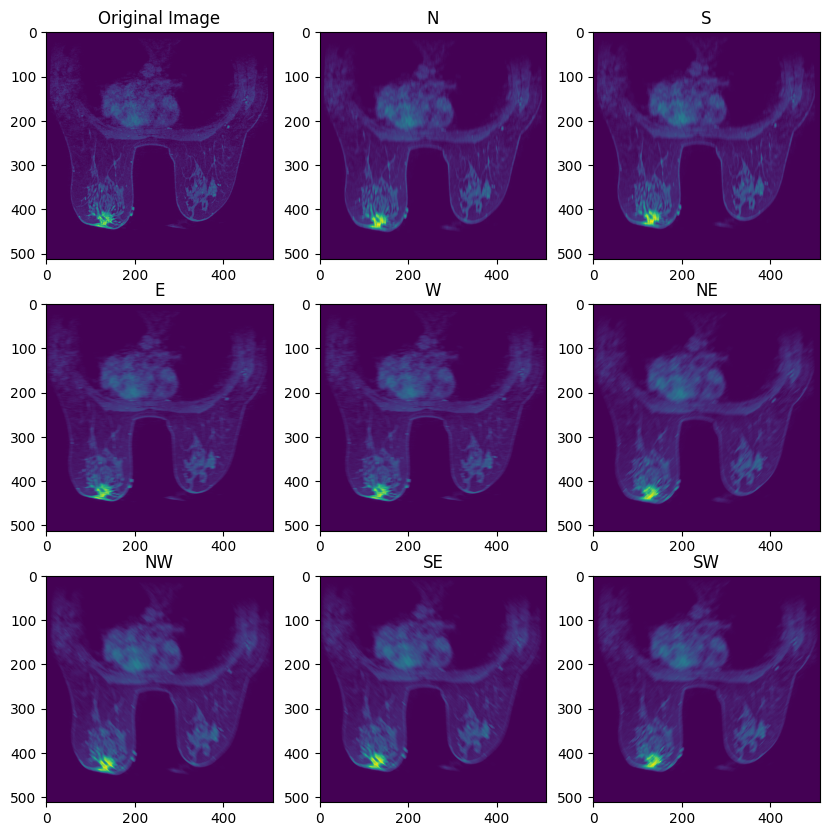

In [16]:
img = load(all_images[0])
fig = plt.figure(figsize=(10,10))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Original Image')

count = 2
for key,value in directions.items():
    # Apply the kernel.
    filtered_img = cv2.filter2D(img, -1, value)
    plt.subplot(3, 3, count)
    plt.imshow(filtered_img)
    plt.title(key)
    count += 1

plt.show()

In [27]:
for image_path in all_images:
    img = load(image_path)
    filename = image_path.split('/')[-1]
    for key,value in directions.items():
        path = os.path.join('/workspaces/breast-tumor-detection/Data/MotionBlurred_Data/', key)
        # print(path)
        if not os.path.exists(path): 
            os.mkdir(path)

        # Apply the kernel.
        filtered_img = cv2.filter2D(img, -1, value)
        im = Image.fromarray(filtered_img)
        
        if im.mode != 'RGB':
            im = im.convert('RGB')
        im.save(os.path.join(path,filename))
        